# Decision Tree Classification - Car Evaluation

## Import Necessary Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## -- ML Related LIbraries####
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Load the dataset heart

In [2]:
## For Google Drive URL
#file_id = "1B95_hrMGmoPE6fFAkU_iTAtzLBTVmPkL"
#url = f"https://drive.google.com/uc?id={file_id}"

# Github url
cols=['buying','maint_cost','doors','persons','lug_boot','safety','class']
url = 'https://github.com/vmahawar/data-science-datasets-collection/raw/main/car_evaluation.csv'
car = pd.read_csv(url,header=None,names=cols)

In [3]:
car.head()

,buying,maint_cost,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car.shape

(1728, 7)

In [5]:
car["doors"].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [6]:
for col in car.columns: 
    print(car[col].value_counts(normalize=True)) 
    print('-----------------------')

buying
vhigh    0.25
high     0.25
med      0.25
low      0.25
Name: proportion, dtype: float64
-----------------------
maint_cost
vhigh    0.25
high     0.25
med      0.25
low      0.25
Name: proportion, dtype: float64
-----------------------
doors
2        0.25
3        0.25
4        0.25
5more    0.25
Name: proportion, dtype: float64
-----------------------
persons
2       0.333333
4       0.333333
more    0.333333
Name: proportion, dtype: float64
-----------------------
lug_boot
small    0.333333
med      0.333333
big      0.333333
Name: proportion, dtype: float64
-----------------------
safety
low     0.333333
med     0.333333
high    0.333333
Name: proportion, dtype: float64
-----------------------
class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64
-----------------------


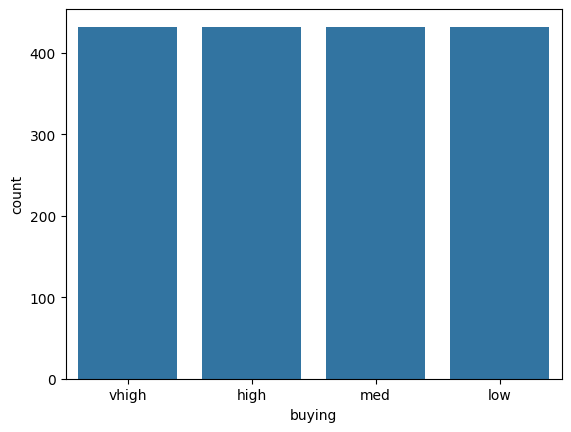

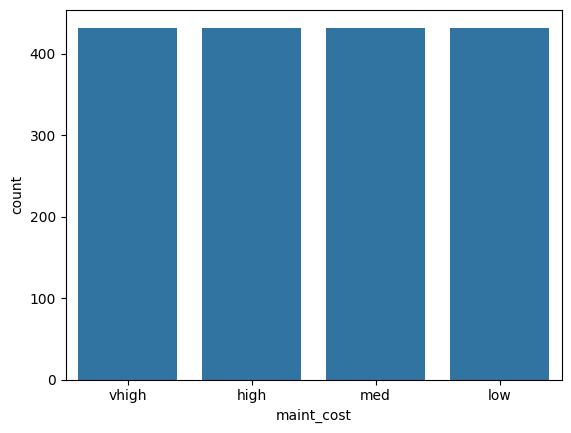

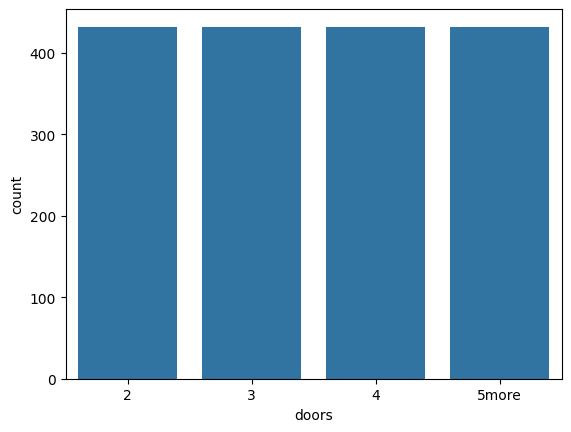

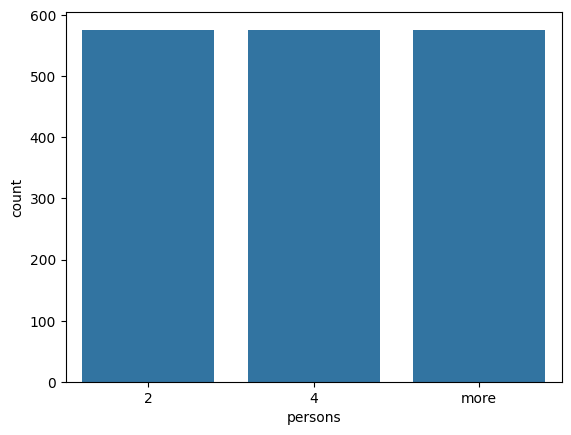

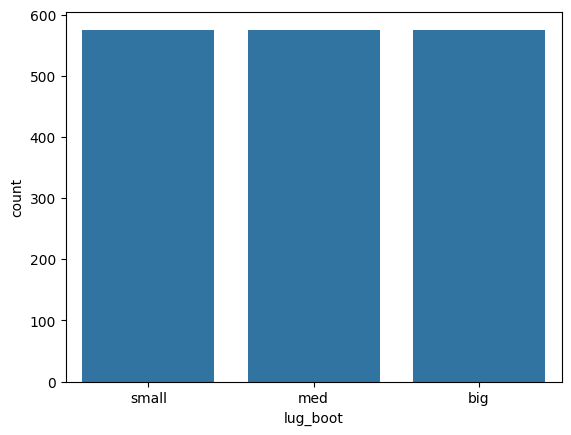

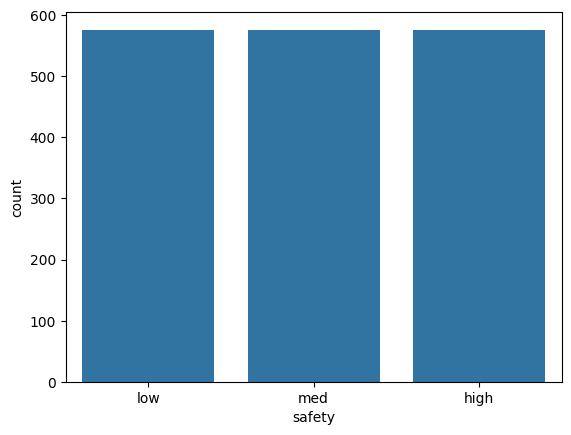

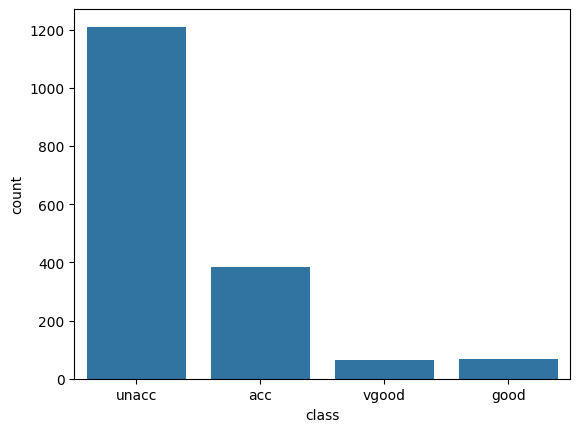

In [7]:
for col in car.columns:
    sns.countplot(x=car[col])
    plt.show()

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   maint_cost  1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   lug_boot    1728 non-null   object
 5   safety      1728 non-null   object
 6   class       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
car.isnull().mean()

buying        0.0
maint_cost    0.0
doors         0.0
persons       0.0
lug_boot      0.0
safety        0.0
class         0.0
dtype: float64

## Perform Train Test Split

In [10]:
# Missing Value imputation is not mandatory in Tree Models
# Scaling is not mandatory in Tree Models #In industry people do not do it
# Outlier Treatment is not mandatory in Tree Models #In industry people do not do it
# EDA still has to be done irresepctive of model algorithm

In [11]:
X = car.drop('class',axis=1)
y = car['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Validate the shape of train and test

In [13]:
X_train.shape

(1382, 6)

In [14]:
X_test.shape

(346, 6)

In [15]:
import category_encoders as ce

In [16]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint_cost','doors','persons','lug_boot','safety'])
print(encoder)

OrdinalEncoder(cols=['buying', 'maint_cost', 'doors', 'persons', 'lug_boot',
                     'safety'])


In [17]:
X_train = encoder.fit_transform(X_train)
X_train.head()

,buying,maint_cost,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [18]:
X_test = encoder.transform(X_test)
X_test.head()

,buying,maint_cost,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


In [19]:
from sklearn.tree import DecisionTreeClassifier

## Decision Classifier with Depth = 3 using gini

In [37]:
dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = dt_gini.predict(X_test)

In [22]:
y_pred_gini

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
acc=accuracy_score(y_test,y_pred_gini)
print('The testing accuracy with gini is:',acc)

The testing accuracy with gini is: 0.8179190751445087


In [28]:
y_pred_train_gini = dt_gini.predict(X_train)
print('The training accuracy with gini is:',accuracy_score(y_train,y_pred_train_gini))

The training accuracy with gini is: 0.8024602026049205


[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301.0, 58.0, 975.0, 48.0]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301.0, 58.0, 506.0, 48.0]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.5, 0.125, 'gini = 0.634\nsamples = 466\nvalue = [247.0, 58.0, 113.0, 48.0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]'),
 Text(0.75, 0.75, '  False')]

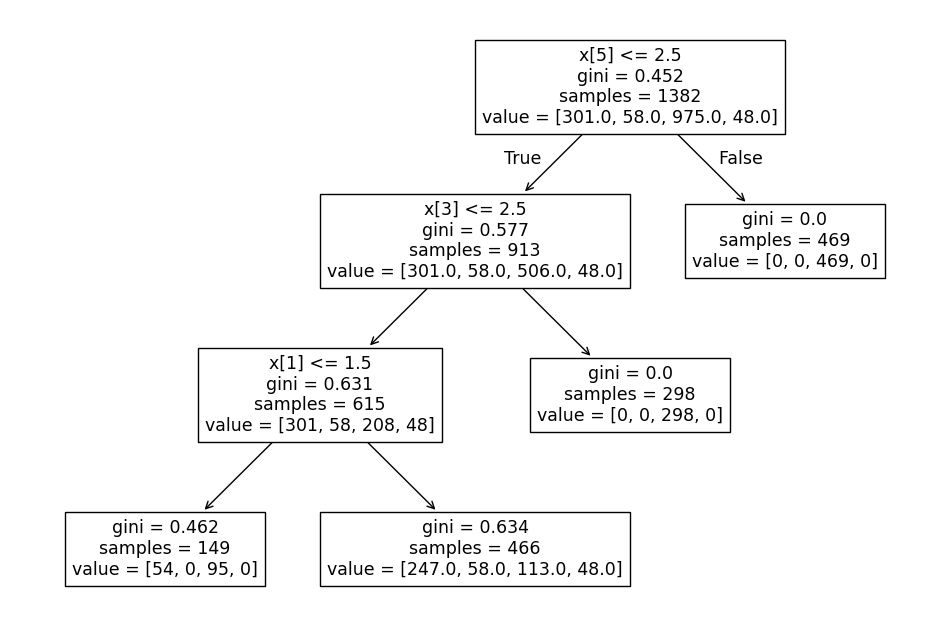

In [29]:
plt.figure(figsize=[12,8])
from sklearn import tree
tree.plot_tree(dt_gini.fit(X_train,y_train))

## Decision Classifier with Depth = 4 using gini

In [38]:
dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [39]:
y_pred_gini = dt_gini.predict(X_test)

In [40]:
y_pred_gini

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'un

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
acc=accuracy_score(y_test,y_pred_gini)
print('The testing accuracy with gini is:',acc)

The testing accuracy with gini is: 0.8121387283236994


In [43]:
y_pred_train_gini = dt_gini.predict(X_train)
print('The training accuracy with gini is:',accuracy_score(y_train,y_pred_train_gini))

The training accuracy with gini is: 0.8039073806078147


[Text(0.75, 0.9, 'x[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301.0, 58.0, 975.0, 48.0]'),
 Text(0.625, 0.7, 'x[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301.0, 58.0, 506.0, 48.0]'),
 Text(0.6875, 0.8, 'True  '),
 Text(0.5, 0.5, 'x[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.25, 0.3, 'x[0] <= 1.5\ngini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37, 0]'),
 Text(0.375, 0.1, 'gini = 0.499\nsamples = 112\nvalue = [54.0, 0.0, 58.0, 0.0]'),
 Text(0.75, 0.3, 'x[0] <= 1.5\ngini = 0.634\nsamples = 466\nvalue = [247.0, 58.0, 113.0, 48.0]'),
 Text(0.625, 0.1, 'gini = 0.5\nsamples = 116\nvalue = [57.0, 0.0, 59.0, 0.0]'),
 Text(0.875, 0.1, 'gini = 0.635\nsamples = 350\nvalue = [190.0, 58.0, 54.0, 48.0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]'),
 Text(0.8125, 0.8, '  False')]

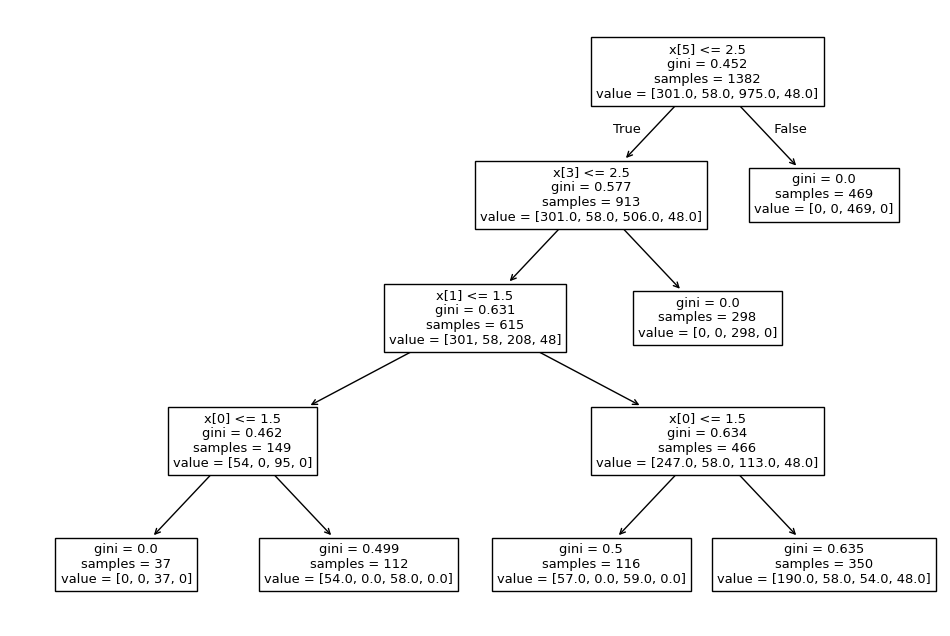

In [44]:
plt.figure(figsize=[12,8])
from sklearn import tree
tree.plot_tree(dt_gini.fit(X_train,y_train))

## Decision Classifier with Depth = 3 using entropy

In [45]:
dt_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dt_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
y_pred_en = dt_en.predict(X_test)

In [47]:
y_pred_en

array(['unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
acy_pred_en=accuracy_score(y_test,y_pred_en)
print('The testing accuracy with entropy is:',acc)

The testing accuracy with entropy is: 0.8179190751445087


In [51]:
y_pred_train_en = dt_en.predict(X_train)
print('The training accuracy with entropy is:',accuracy_score(y_train,y_pred_train_en))

The training accuracy with entropy is: 0.8024602026049205


[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301.0, 58.0, 975.0, 48.0]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301.0, 58.0, 506.0, 48.0]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.5, 0.125, 'entropy = 1.693\nsamples = 466\nvalue = [247.0, 58.0, 113.0, 48.0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]'),
 Text(0.75, 0.75, '  False')]

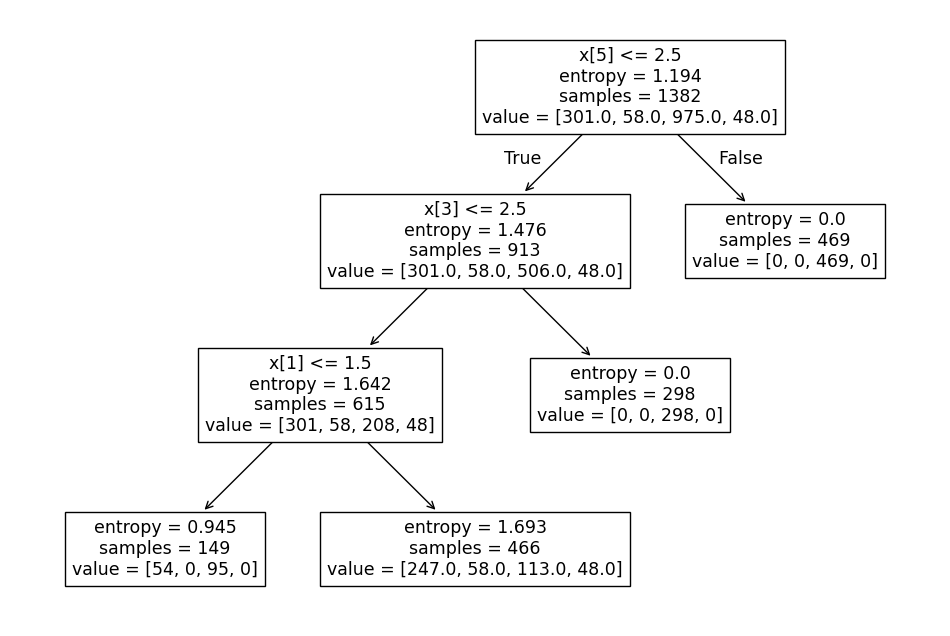

In [52]:
plt.figure(figsize=[12,8])
from sklearn import tree
tree.plot_tree(dt_en.fit(X_train,y_train))